# Movie Review Sentiment Analysis Using (ANN, DNN with LSTM)

### Importing Important Liabraries

In [51]:
# to parse HTML contents
from bs4 import BeautifulSoup

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# to create word clouds
from wordcloud import WordCloud, STOPWORDS 

# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for deep learning 
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from tensorflow.keras.optimizers import Adam

In [2]:
## Importing Database from files
df_movie = pd.read_csv('Data/IMDB Dataset.csv');

# Displaying some records from database
df_movie.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Shape of database. Showing rows and columns
df_movie.shape

(50000, 2)

In [4]:
# Description of databse
df_movie.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [5]:
# How many values of negetive and positive
df_movie['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
# Dividing the data into train and test data frame
test_df = df_movie.drop('sentiment', axis=1)
train_df = df_movie

In [7]:
# Getting train data columns
train_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
# Getting test data columns
test_df

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [9]:
# Spliting test database for 
final_test_df = test_df[40000:]

In [10]:
final_test_df

,review
40000,First off I want to say that I lean liberal on...
40001,I was excited to see a sitcom that would hopef...
40002,When you look at the cover and read stuff abou...
40003,"Like many others, I counted on the appearance ..."
40004,"This movie was on t.v the other day, and I did..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [11]:
# Splitting Train data for training and validation
final_train_df = train_df[:40000]

In [12]:
# Training Data Shape
final_train_df.shape

(40000, 2)

In [13]:
# Testing Data Shape
final_test_df.shape

(10000, 1)

In [14]:
# converting dataframe to csv dataset
final_test_df.to_csv('Data/testData.csv', index=False )

In [15]:
testData = pd.read_csv('Data/testData.csv')
testData.head()

,review
0,First off I want to say that I lean liberal on...
1,I was excited to see a sitcom that would hopef...
2,When you look at the cover and read stuff abou...
3,"Like many others, I counted on the appearance ..."
4,"This movie was on t.v the other day, and I did..."


In [16]:
# Getting train data values of negetive and positive
final_train_df['sentiment'].value_counts()

negative    20007
positive    19993
Name: sentiment, dtype: int64

In [17]:
# Importing and initalising LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
y = final_train_df['sentiment'].values

In [19]:
y

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [20]:
# processing sentiment values
y = le.fit_transform(y)

In [21]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [22]:
final_train_df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
39995    This was a marvelously funny comedy with a gre...
39996    There is no plot. There are no central charact...
39997    This show is awesome! I love all the actors! I...
39998    The fact that this movie has been entitled to ...
39999    I have to confess that I am severely disappoin...
Name: review, Length: 40000, dtype: object

### Importing Pre Processing Liabraries

In [23]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [24]:
stop = stopwords.words('english')
ps = PorterStemmer()

In [25]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", " ")
    sample = re.sub("[^a-zA-Z ]+", " ", sample)
    
    sample = sample.split()
    sample = [ps.stem(s) for s in sample if s not in stop]
    
    sample = " ".join(sample)
    
    return sample

In [26]:
df_movie['review'][10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [27]:
clean_text(final_train_df['review'][10])

'phil alien one quirki film humour base around odd everyth rather actual punchlin first odd pretti funni movi progress find joke odd funni anymor low budget film that never problem pretti interest charact eventu lost interest imagin film would appeal stoner current partak someth similar better tri brother anoth planet'

In [28]:
final_train_df['cleaned_review'] = final_train_df['review'].apply(clean_text)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
final_train_df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [30]:
corpus = final_train_df['cleaned_review'].values

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [32]:
cvec = CountVectorizer(max_df = 0.5, max_features=50000)

In [33]:
X = cvec.fit_transform(corpus)

In [34]:
print(X[0])

  (0, 33335)	1
  (0, 26705)	1
  (0, 47453)	3
  (0, 29816)	6
  (0, 13180)	2
  (0, 19376)	1
  (0, 33482)	2
  (0, 13460)	1
  (0, 17785)	1
  (0, 14317)	2
  (0, 42400)	1
  (0, 40071)	2
  (0, 6186)	1
  (0, 45094)	1
  (0, 35176)	1
  (0, 46769)	4
  (0, 36145)	1
  (0, 48709)	2
  (0, 16022)	1
  (0, 43960)	1
  (0, 36892)	4
  (0, 13724)	1
  (0, 18253)	1
  (0, 42763)	1
  (0, 32028)	1
  :	:
  (0, 38267)	1
  (0, 28561)	1
  (0, 20936)	2
  (0, 23154)	1
  (0, 29445)	1
  (0, 15698)	2
  (0, 47710)	1
  (0, 25856)	1
  (0, 26912)	1
  (0, 8388)	1
  (0, 44155)	1
  (0, 5105)	1
  (0, 23951)	1
  (0, 39957)	1
  (0, 37524)	1
  (0, 13557)	1
  (0, 26274)	1
  (0, 4559)	1
  (0, 9021)	1
  (0, 44767)	1
  (0, 46646)	1
  (0, 42216)	1
  (0, 43290)	1
  (0, 10533)	1
  (0, 37093)	1


In [35]:
#Initialising TFIDF transformer
tfidf = TfidfTransformer()

In [36]:
X = tfidf.fit_transform(X)
print(X[0])

  (0, 48799)	0.026173377325104455
  (0, 48709)	0.09211540883939487
  (0, 47710)	0.02694568611724924
  (0, 47453)	0.07402836482305311
  (0, 46769)	0.21552554614669464
  (0, 46646)	0.04431344214723159
  (0, 45894)	0.03521639454429318
  (0, 45094)	0.1042966684603418
  (0, 44767)	0.07613008307397072
  (0, 44155)	0.03778527961251583
  (0, 43960)	0.06496701430439099
  (0, 43290)	0.05046377769530096
  (0, 42763)	0.09717098420012206
  (0, 42400)	0.02987461068839155
  (0, 42216)	0.06731625767169813
  (0, 41621)	0.059728837917542875
  (0, 40771)	0.07022121668431439
  (0, 40071)	0.15303583096068427
  (0, 39957)	0.05576807737486982
  (0, 39425)	0.05323477339889361
  (0, 39368)	0.07184309439586294
  (0, 38267)	0.07498502707637711
  (0, 37524)	0.0614595472330187
  (0, 37093)	0.0489313553578405
  (0, 36892)	0.12490763422669125
  :	:
  (0, 11200)	0.048770300147981525
  (0, 10685)	0.04580354050374655
  (0, 10671)	0.049938032938431715
  (0, 10533)	0.08031038131522436
  (0, 10520)	0.0667938696202192
  (0

In [37]:
X.shape

(40000, 50000)

In [38]:
y.shape

(40000,)

## Artificial Nueral Network

In [39]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [40]:
model = models.Sequential()
model.add( Dense(16, activation = "relu", input_shape = (X.shape[1],)))
model.add( Dense(16, activation = "relu"))
model.add( Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                800016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [43]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [44]:
X_train.shape, y_train.shape 

((35000, 50000), (35000,))

In [45]:
hist = model.fit(X_train.todense(), y_train, batch_size=128, epochs=15, validation_data=(X_val.todense(), y_val))

Epoch 1/15
274/274 [==============================] - 17s 63ms/step - loss: 0.4342 - accuracy: 0.8597 - val_loss: 0.2574 - val_accuracy: 0.8988
Epoch 2/15
274/274 [==============================] - 13s 49ms/step - loss: 0.2071 - accuracy: 0.9184 - val_loss: 0.2422 - val_accuracy: 0.8986
Epoch 3/15
274/274 [==============================] - 12s 45ms/step - loss: 0.1645 - accuracy: 0.9378 - val_loss: 0.2562 - val_accuracy: 0.9012
Epoch 4/15
274/274 [==============================] - 11s 42ms/step - loss: 0.1392 - accuracy: 0.9482 - val_loss: 0.2696 - val_accuracy: 0.8986
Epoch 5/15
274/274 [==============================] - 12s 42ms/step - loss: 0.1223 - accuracy: 0.9549 - val_loss: 0.2866 - val_accuracy: 0.8940
Epoch 6/15
274/274 [==============================] - 12s 43ms/step - loss: 0.1103 - accuracy: 0.9611 - val_loss: 0.3017 - val_accuracy: 0.8930
Epoch 7/15
274/274 [==============================] - 10s 36ms/step - loss: 0.0985 - accuracy: 0.9647 - val_loss: 0.3219 - val_accuracy:

### Visualization of Model

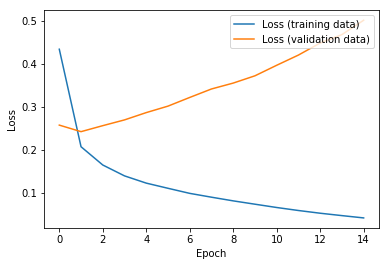

In [46]:
plt.plot(hist.history['loss'], label='Loss (training data)')
plt.plot(hist.history['val_loss'], label='Loss (validation data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

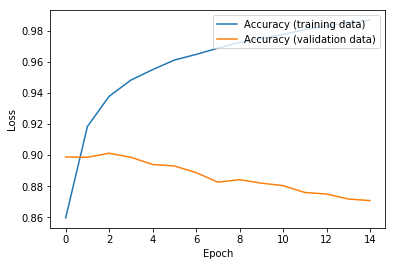

In [47]:
plt.plot(hist.history['accuracy'], label='Accuracy (training data)')
plt.plot(hist.history['val_accuracy'], label='Accuracy (validation data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [48]:
# Eveluating Model
model.evaluate(X_val.todense(), y_val)

157/157 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.8708


[0.501707136631012, 0.8708000183105469]

## LSTM with DNN

In [50]:
df_movie.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [52]:
# function for plotting n-gram

def plot_ngram(sentiment, n):
    
    temp_df = df_movie[df_movie['sentiment'] == sentiment]
    
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['review'])
    
    frequencies = sum(sparse_matrix).toarray()[0]
    
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

In [53]:
# plotting a wordcloud

def plot_wordcloud(review, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', stopwords = stopwords, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(review)
    plt.axis('off')
    plt.imshow(wc)

In [54]:
# to plot model accuracy and loss

def plot_history(history):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='green', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orangered', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='green', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orangered', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [55]:
# to plot confusion matrix
# ========================

def plot_cm(pred, ticklabels, figsize):
    
    pred = pred.ravel()
    pred = np.round(pred)
      
    fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))

    cm = confusion_matrix(validation_labels, pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(ticklabels)
    ax.set_yticklabels(ticklabels, rotation=0)

    plt.show()

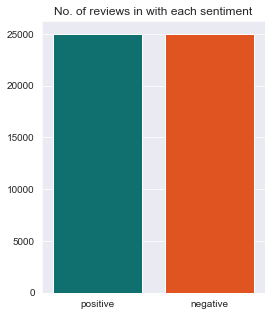

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(4, 5))
sns.countplot(df_movie['sentiment'], palette=['teal', 'orangered'])
plt.title('No. of reviews in with each sentiment')
plt.xlabel("")
plt.ylabel("")
plt.show()

In [58]:
# Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

# specific stopwords
specific_sw = ['br', 'movie', 'film']

# all stopwords
stopwords = stopwords + specific_sw

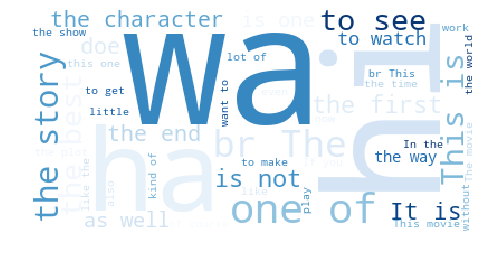

In [60]:
# word cloud on positve reviews
pos_rev = ' '.join(df_movie[df_movie['sentiment']=='positive']['review'].to_list()[:10000])
plot_wordcloud(pos_rev, 'Blues')

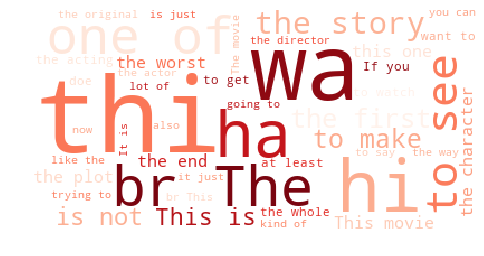

In [61]:
# word cloud on positve reviews
neg_rev = ' '.join(df_movie[df_movie['sentiment']=='negative']['review'].to_list()[:10000])
plot_wordcloud(neg_rev, 'Reds')

In [62]:
plot_ngram('positive', 1)

,index,frequency
0,the,341281
1,and,176634
2,of,152105
3,to,131322
4,is,111830
5,in,99250
6,br,97954
7,it,95133
8,this,69648
9,that,69593


In [63]:
plot_ngram('negative', 1)

,index,frequency
0,the,326712
1,and,147807
2,of,137305
3,to,136802
4,br,103997
5,is,99252
6,it,95724
7,in,87531
8,this,81354
9,that,74286


In [64]:
# to remove non alphanumeric character
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [65]:
# apply preprocessing steps

df_movie['review'] = df_movie['review'].apply(remove_URL)
df_movie['review'] = df_movie['review'].apply(remove_html)
df_movie['review'] = df_movie['review'].str.lower()
df_movie['review'] = df_movie['review'].apply(alpha_num)
df_movie['review'] = df_movie['review'].apply(remove_stopwords)

df_movie.head()

,review,sentiment
0,one reviewers mentioned watching just 1 oz epi...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [66]:
# container for sentences
reviews = np.array([review for review in df_movie['review']])

# container for labels
labels = np.array([label for label in df_movie['sentiment']])

In [67]:
# label encoding labels 

enc = LabelEncoder()
encoded_labels = enc.fit_transform(labels)

print(enc.classes_)
print(labels[:5])
print(encoded_labels[:5])

['negative' 'positive']
['positive' 'positive' 'positive' 'negative' 'positive']
[1 1 1 0 1]


In [68]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(reviews, encoded_labels, 
                                                                                          test_size=0.33, 
                                                                                          stratify=labels)

In [69]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
training_sequence = tokenizer.texts_to_sequences(train_sentences)
testing_sequence = tokenizer.texts_to_sequences(validation_sentences)
train_pad_sequence = pad_sequences(training_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
test_pad_sequence = pad_sequences(testing_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
print('Total Unique Words : {}'.format(len(word_index)))

Total Unique Words : 171782


In [70]:
embedded_words = {}
with open('Data/glove.6B.200d.txt') as file:
    for line in file:
        words, coeff = line.split(maxsplit=1)
        coeff = np.array(coeff.split(),dtype = float)
        embedded_words[words] = coeff

In [71]:
embedding_matrix = np.zeros((len(word_index) + 1,200))
for word, i in word_index.items():
    embedding_vector = embedded_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [72]:
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(len(word_index) + 1,200,weights=[embedding_matrix],input_length=200,
                            trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(24,activation = 'relu',),  
                             tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])

In [73]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          34356600  
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               135680    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 34,495,401
Trainable params: 138,801
Non-trainable params: 34,356,600
_________________________________________________________________


In [74]:
model_lstm.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')
history = model_lstm.fit(train_pad_sequence,train_labels,epochs = 30 ,validation_data=(test_pad_sequence,validation_labels))

Epoch 1/30
1047/1047 [==============================] - 311s 297ms/step - loss: 0.4401 - accuracy: 0.7948 - val_loss: 0.3569 - val_accuracy: 0.8462
Epoch 2/30
1047/1047 [==============================] - 308s 294ms/step - loss: 0.3360 - accuracy: 0.8554 - val_loss: 0.3851 - val_accuracy: 0.8299
Epoch 3/30
1047/1047 [==============================] - 300s 286ms/step - loss: 0.2945 - accuracy: 0.8762 - val_loss: 0.3070 - val_accuracy: 0.8695
Epoch 4/30
1047/1047 [==============================] - 300s 287ms/step - loss: 0.2674 - accuracy: 0.8876 - val_loss: 0.2983 - val_accuracy: 0.8721
Epoch 5/30
1047/1047 [==============================] - 300s 287ms/step - loss: 0.2358 - accuracy: 0.9026 - val_loss: 0.2929 - val_accuracy: 0.8839
Epoch 6/30
1047/1047 [==============================] - 300s 287ms/step - loss: 0.2065 - accuracy: 0.9159 - val_loss: 0.3034 - val_accuracy: 0.8800
Epoch 7/30
1047/1047 [==============================] - 296s 283ms/step - loss: 0.1799 - accuracy: 0.9287 - val_

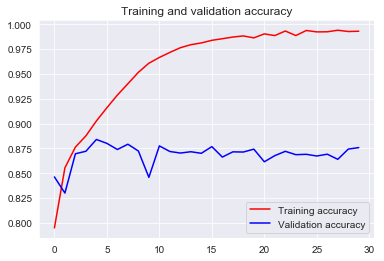

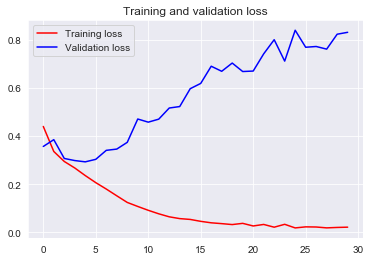

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [76]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))

Training Accuracy: 0.9940000176429749
Validation Accuracy: 0.8839393854141235


## Conclusion

#### In above project we tried to Analyse IMDB Movie Rating Using different Deep Neural Network Models (ANN + DNN {BiLSTM})

##### Initially we imported IMDB Movie Review Database to check count values of nature of  review wheater it is positive or negetive.

##### And then we cleaned the data by eliminatating stopwords , html tags and numerical characters from reviews. To effectively process the strings in models.

##### After pre-processing of reviews and cleaning the text. we have checked weather senitment is positive or negetive.

##### We use TFIDF (Term Frequency - Inverse Document Frequency) Transformer to transform the review text to check the frequency of text. If frequency is greater then 0.5 its positive else negetive.

##### We also use Glove text file to obtain vector representation of words and to train the model better.

##### We compared two types of Neural Networks (ANN and DNN) respectively to get which model will give us more accuracy. 

##### And we found that DNN with BiLSTM gave us Accuracy of 99% and validation accuracy of 88.39%